In [54]:
import sys
import os.path as path
import matplotlib.pyplot as plt
from scipy.signal import remez
import numpy as np
from scipy.stats import zscore

In [2]:
sys.path

['/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/notebooks/filtering',
 '/home/siegman/miniconda3/lib/python37.zip',
 '/home/siegman/miniconda3/lib/python3.7',
 '/home/siegman/miniconda3/lib/python3.7/lib-dynload',
 '',
 '/home/siegman/miniconda3/lib/python3.7/site-packages',
 '/home/siegman/miniconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/siegman/.ipython']

In [7]:
path.abspath('../..')

'/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code'

In [8]:
sys.path.append(path.abspath('../..'))

In [39]:
import diss3_code.database.get_db_data as gdd
import diss3_code.signal.smooth_component_analysis as sca

In [79]:
data = gdd.get_db_data()
data.get_participants()

Exception during reset or similar
Traceback (most recent call last):
  File "/home/siegman/miniconda3/lib/python3.7/site-packages/pymysql/connections.py", line 683, in _read_bytes
    data = self._rfile.read(num_bytes)
  File "/home/siegman/miniconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/siegman/miniconda3/lib/python3.7/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/home/siegman/miniconda3/lib/python3.7/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/home/siegman/miniconda3/lib/python3.7/site-packages/sqlalchemy/dialects/mysql/base.py", line 2496, in do_rollback
    dbapi_connection.rollback()
  File "/home/siegman/miniconda3/lib/python3.7/site-packages/pym

[(1001, 101),
 (1001, 102),
 (1001, 103),
 (1003, 108),
 (1003, 109),
 (1004, 110),
 (1004, 111),
 (1004, 112),
 (1005, 113),
 (1005, 114),
 (1005, 115),
 (1006, 116),
 (1006, 117),
 (1006, 118),
 (1007, 119),
 (1007, 120),
 (1007, 121),
 (1008, 122),
 (1008, 123),
 (1008, 124),
 (1009, 125),
 (1009, 126),
 (1009, 127),
 (1010, 128),
 (1010, 129),
 (1010, 130),
 (1011, 131),
 (1011, 132),
 (1011, 133),
 (1012, 134),
 (1012, 135),
 (1012, 136),
 (1013, 137),
 (1013, 138),
 (1013, 139),
 (1014, 140),
 (1014, 141),
 (1014, 142),
 (1015, 144),
 (1015, 145),
 (1016, 146),
 (1016, 147),
 (1016, 148),
 (1017, 149),
 (1017, 151),
 (1019, 155),
 (1019, 156),
 (1019, 157),
 (1020, 158),
 (1020, 159),
 (1020, 160),
 (1022, 164),
 (1022, 165),
 (1022, 166),
 (1023, 167),
 (1023, 168),
 (1023, 169),
 (1024, 170),
 (1024, 171),
 (1024, 172),
 (1025, 173),
 (1025, 174),
 (1025, 175),
 (1026, 176),
 (1026, 177),
 (1026, 178),
 (1027, 179),
 (1027, 180),
 (1027, 181),
 (1028, 182),
 (1028, 183),
 (1028

In [13]:
p1=data.get_signal_by_series_type_and_interp_type([144,145],3,3)

In [15]:
a = list(p1)

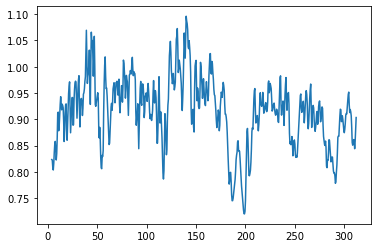

In [28]:
plt.plot(a[0][1][:,0],a[0][1][:,1])

(617,) (593,)


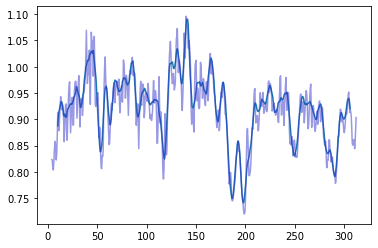

In [63]:
t = a[0][1][:,0]
x = a[0][1][:,1]
h = remez(25, [0., 0.1, 0.15, 1.],[1., 0.],fs =2.)
b = np.convolve(x,h,mode='valid')
print(x.shape, b.shape)


plt.plot(t[12:-12],b)
plt.plot(t,x,color=(0.2, 0.2, 0.8, 0.5))

In [45]:
savgol = sca.savitzky_golay([1015],21,11,3,3)

In [46]:
sigs = savgol.get_aligned_signal_componets()
sigs

x range: 4.0 312.0


1015                                                              \
      Raw_144    Sg_144 resid_144   rms_144  rmso_144   Raw_145    Sg_145   
0   -1.405672 -1.756505  0.350833  0.198711  0.243124 -2.964199 -3.259442   
1   -1.421515 -1.655343  0.233828  0.206167  0.248022 -2.924280 -3.110340   
2   -1.638289 -1.554180 -0.084109  0.206625  0.245922 -2.941451 -2.961237   
3   -1.707296 -1.453017 -0.254279  0.201331  0.238070 -2.967747 -2.812134   
4   -1.514592 -1.351854 -0.162738  0.263759  0.297940 -2.940754 -2.663031   
..        ...       ...       ...       ...       ...       ...       ...   
612 -0.890321 -0.671060 -0.219262  0.388472  0.405440  1.434899  0.517236   
613 -1.092166 -0.732506 -0.359659  0.387830  0.406351  1.296449  0.499336   
614 -0.868385 -0.793953 -0.074432  0.375019  0.395094  0.568335  0.481437   
615 -0.498515 -0.855400  0.356886  0.349327  0.370956  0.200698  0.463537   
616 -0.189121 -0.916847  0.727726  0.336425  0.359607  0.624412  0.445638   

                                   
    resid_145   rms_145  rmso_145  
0    0.295243  0.251190  0.063554  
1    0.186060  0.268202  0.089149  
2    0.019785  0.299628  0.129160  
3   -0.155613  0.312871  0.150986  
4   -0.277723  0.330079  0.176777  
..        ...       ...       ...  
612  0.917663  0.598022  0.627797  
613  0.797113  0.505163  0.533908  
614  0.086898  0.479536  0.507251  
615 -0.262839  0.543881  0.570566  
616  0.178774  0.547399  0.573053  

[617 rows x 10 columns]

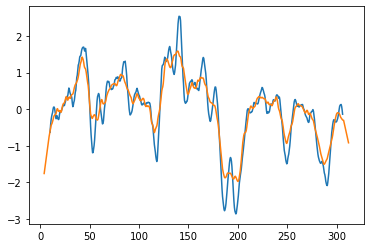

In [62]:
plt.plot(t[12:-12],zscore(b))
plt.plot(t,sigs[(1015,'Sg_144')])


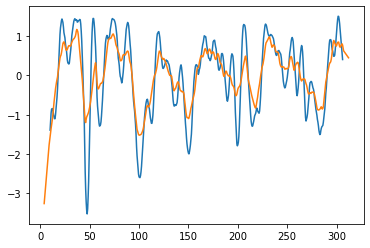

In [65]:
x = a[1][1][:,1]
b1 = np.convolve(x,h,mode='valid')

plt.plot(t[12:-12],zscore(b1))
plt.plot(t,sigs[(1015,'Sg_145')])


In [87]:
savgol2 = sca.savitzky_golay([1015],21,11,2,3)
sigs2 = savgol2.get_aligned_signal_componets()
a2=list(data.get_signal_by_series_type_and_interp_type([144,145],2,3))
new_filter = lambda x: np.convolve(x,h,'mirror')

t = a2[0][1][:,0]
x = a2[0][1][:,1]

plt.plot(t,x)
plt.plot(t[12:-12],new_filter(x))

x range: 4.0 224.5


OperationalError: (pymysql.err.OperationalError) (2013, 'Lost connection to MySQL server during query ([Errno 104] Connection reset by peer)')
[SQL: 
SELECT data_time, data_value
FROM interpolated_interval_data
INNER JOIN group_series_interpolation_interval USING
    (series_type_id, interpolation_series_id, group_id)
WHERE participant_id = %(par)s
AND series_type_id = %(series_type)s
AND interpolation_series_id = %(interp_type)s
AND data_value is not null
AND data_time >= interval_start
ORDER BY data_time
]
[parameters: {'par': 144, 'series_type': 2, 'interp_type': 3}]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

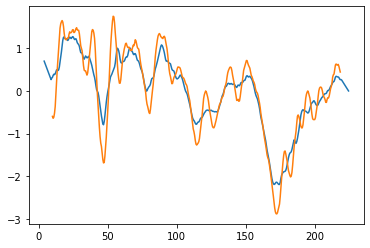

In [72]:
plt.plot(t,sigs2[(1015,'Sg_144')])
plt.plot(t[12:-12],zscore(new_filter(x)))

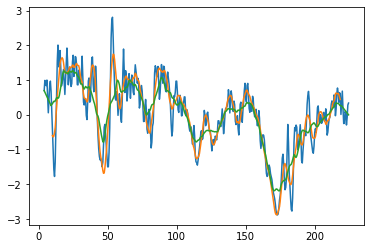

In [74]:
plt.plot(t,sigs2[(1015,'Raw_144')])
plt.plot(t[12:-12],zscore(new_filter(x)))
plt.plot(t,sigs2[(1015,'Sg_144')])


In [86]:
data.con.connect()